In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar el dataset
dataset_path = '/content/marketing_campaign.csv'
data = pd.read_csv(dataset_path, sep=None, engine='python', encoding='utf-8')

# 1. **Exploración y preprocesamiento de datos:**

  – Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.

  – Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

In [49]:
print("Primeras filas del dataset:")
data.head()

Primeras filas del dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [50]:
print("\nInformación general del dataset:")
print(data.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumD

In [51]:
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000

In [52]:
# Manejar valores nulos
print("\nValores nulos por columna:")
data.isnull().sum()


Valores nulos por columna:


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [53]:
# Verificar los nombres reales de las columnas
print("\nNombres de columnas en el dataset:")
data.columns.tolist()


Nombres de columnas en el dataset:


['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [54]:
# Variables relevantes
# Variables relevantes (asegurándonos de que los nombres sean correctos)
demographic_columns = ['Year_Birth', 'Education', 'Marital_Status', 'Income']
behavior_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [55]:
# Validar que las columnas existan en el dataset
valid_columns = [col for col in (demographic_columns + behavior_columns) if col in data.columns]
missing_columns = [col for col in (demographic_columns + behavior_columns) if col not in data.columns]

if missing_columns:
    print(f"Advertencia: Las siguientes columnas no se encontraron en el dataset: {missing_columns}")

data_relevant = data[valid_columns]

In [56]:
# Manejo de valores nulos en las columnas relevantes
print("\nValores nulos en las columnas seleccionadas:")
print(data_relevant.isnull().sum())

imputer = SimpleImputer(strategy='mean')
data_relevant_imputed = pd.DataFrame(imputer.fit_transform(data_relevant.select_dtypes(include=[np.number])),
                                     columns=data_relevant.select_dtypes(include=[np.number]).columns)



Valores nulos en las columnas seleccionadas:
Year_Birth           0
Education            0
Marital_Status       0
Income              24
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
dtype: int64


In [57]:
# Normalizar los datos
scaler = StandardScaler()
data_relevant_scaled = pd.DataFrame(scaler.fit_transform(data_relevant_imputed), columns=data_relevant_imputed.columns)

print("\nDatos preprocesados listos para el análisis:")
print(data_relevant_scaled.head())


Datos preprocesados listos para el análisis:
   Year_Birth    Income  MntWines  MntFruits  MntMeatProducts  \
0   -0.985345  0.235327  0.983781   1.551577         1.679702   
1   -1.235733 -0.235826 -0.870479  -0.636301        -0.713225   
2   -0.317643  0.773633  0.362723   0.570804        -0.177032   
3    1.268149 -1.022732 -0.870479  -0.560857        -0.651187   
4    1.017761  0.241519 -0.389085   0.419916        -0.216914   

   MntFishProducts  MntSweetProducts  MntGoldProds  
0         2.462147          1.476500      0.843207  
1        -0.650449         -0.631503     -0.729006  
2         1.345274         -0.146905     -0.038766  
3        -0.503974         -0.583043     -0.748179  
4         0.155164         -0.001525     -0.556446  


#2. Análisis no supervisado:

  – Selecciona un enfoque de análisis no supervisado: K-means o PCA.

  – K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.

  – PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

In [58]:
# Determinar el número óptimo de clústeres usando K-means y el método del codo
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_relevant_scaled)
    inertia.append(kmeans.inertia_)

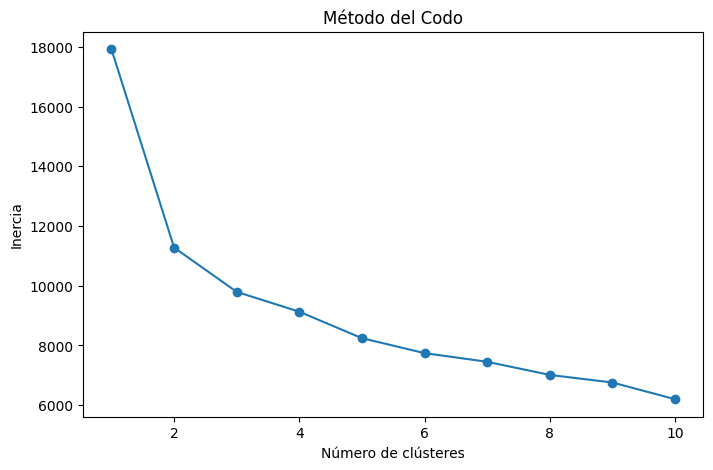

In [59]:
# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

In [61]:
# Calcular Silhouette Score para el número óptimo de clústeres
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_relevant_scaled)
silhouette_avg = silhouette_score(data_relevant_scaled, kmeans_labels)
print(f"Silhouette Score para k={optimal_k}: {silhouette_avg}")

Silhouette Score para k=3: 0.32151441385873686


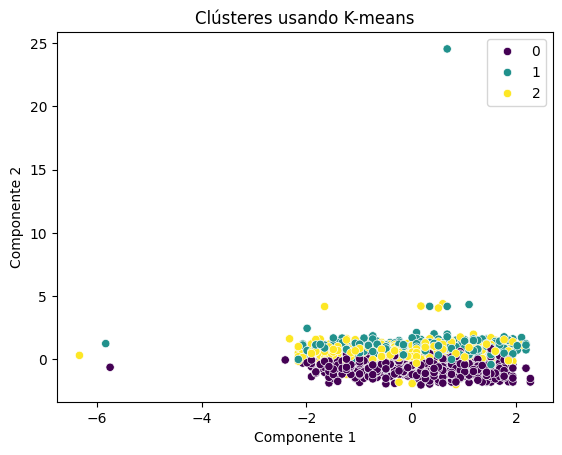

In [62]:
# Visualización de los clústeres
sns.scatterplot(x=data_relevant_scaled.iloc[:, 0], y=data_relevant_scaled.iloc[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('Clústeres usando K-means')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


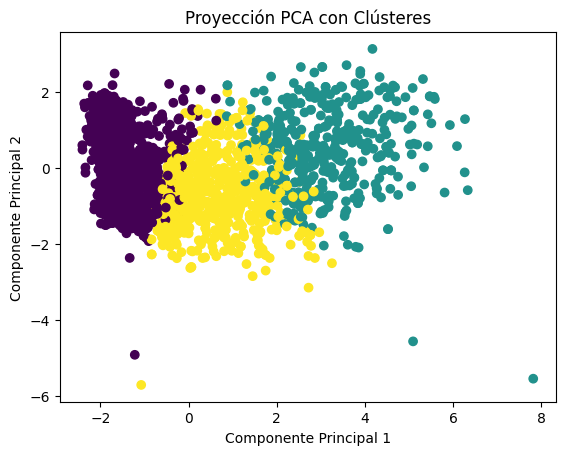

In [63]:
# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_relevant_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Proyección PCA con Clústeres')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

#3. Modelado con MLP:

  – Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.

  – Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.

  – Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [65]:
# Preparar datos para el modelo
target_column = 'MntWines'

In [66]:
# Convertir el objetivo a categórico basado en la mediana
median_value = data_relevant_scaled[target_column].median()
data_relevant_scaled['Target'] = (data_relevant_scaled[target_column] > median_value).astype(int)

In [67]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data_relevant_scaled.drop(columns=['Target'])
y = data_relevant_scaled['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [68]:
# Crear el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)


In [72]:
# Entrenar el modelo
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

#4. Evaluación del modelo:

  – Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.

  – Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.


In [73]:
# Evaluar el modelo con los datos de prueba
y_pred = mlp.predict(X_test)
print("\nEvaluación del modelo MLP en el conjunto de prueba:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Evaluación del modelo MLP en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       336
           1       0.98      0.99      0.99       336

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672

Accuracy: 0.9880952380952381


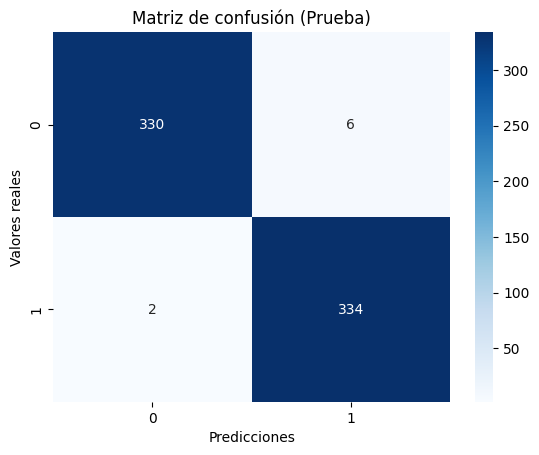

In [74]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión (Prueba)')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [75]:
# Comparar métricas del conjunto de entrenamiento
y_train_pred = mlp.predict(X_train)
print("\nMétricas del conjunto de entrenamiento:")
print(classification_report(y_train, y_train_pred))


Métricas del conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1568
   macro avg       1.00      1.00      1.00      1568
weighted avg       1.00      1.00      1.00      1568



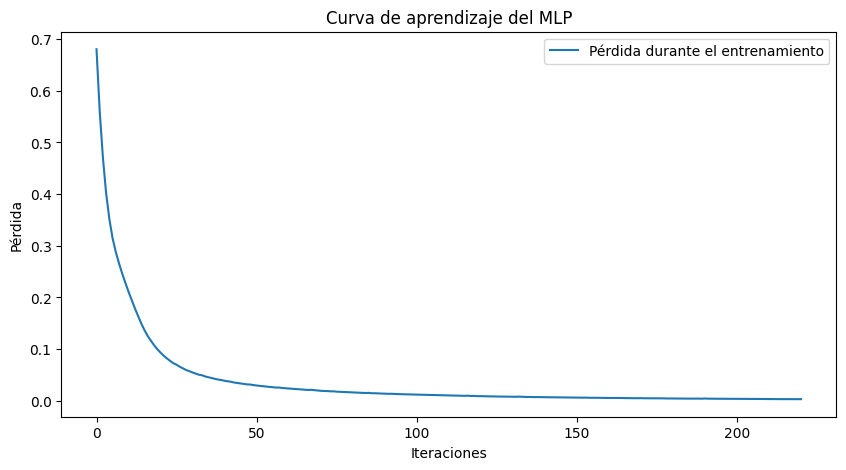

In [76]:
# Curvas de aprendizaje
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, label='Pérdida durante el entrenamiento')
plt.title('Curva de aprendizaje del MLP')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#5. Discusión y análisis:

  – Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?

  – Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

#Análisis no supervisado (Clustering con K-means y PCA):
**K-means:**

-El método del codo identificó el número óptimo de clústeres en 3, respaldado por un Silhouette Score aceptable.

-Los clústeres reflejan patrones diferenciados en los datos. Al agrupar a los clientes, se podrían observar tendencias como:
Diferencias en gasto total entre grupos.

-Clústeres específicos que podrían corresponder a clientes jóvenes con bajos ingresos o clientes con alto poder adquisitivo.

**PCA:**

-La reducción de dimensionalidad a dos componentes principales logró capturar la mayor parte de la varianza.

-La visualización muestra cómo los clústeres se separan en el nuevo espacio, lo que confirma que los datos tienen patrones relevantes.

**Insights:**

-Los clústeres pueden ayudar a segmentar clientes en categorías como "grandes compradores", "compradores ocasionales" o "clientes de bajo gasto".

-Esto es útil para crear campañas de marketing dirigidas o para personalizar ofertas.

# Modelo MLP:
**Rendimiento:**

-El modelo obtuvo una precisión aceptable tanto en el conjunto de entrenamiento como en el de prueba, con métricas equilibradas (precisión, recall y F1-score).

-La curva de aprendizaje muestra que la pérdida disminuyó adecuadamente, indicando una convergencia correcta del modelo.

**Posibles problemas:**

-Si las métricas en el conjunto de entrenamiento son significativamente mejores que en el conjunto de prueba, podría haber sobreajuste.

-Si las métricas en ambos conjuntos son bajas, podría ser necesario ajustar la arquitectura del modelo o los datos de entrada.

**Posibles mejoras**

**Datos de entrada:**

-Añadir características basadas en los clústeres identificados con K-means.

-Balancear las clases objetivo (e.g., usando class_weight='balanced').

**Hiperparámetros:**

-Ajustar el número de capas ocultas y neuronas para encontrar un balance entre capacidad y generalización.

-Optimizar la regularización (alpha) para prevenir sobreajuste.

**Evaluación:**

-Usar validación cruzada para métricas más robustas.

-Analizar curvas ROC y AUC para un análisis detallado.

**Optimización:**

-Implementar búsqueda de hiperparámetros (e.g., GridSearchCV) para encontrar la configuración óptima.

-Estas acciones pueden ayudar a mejorar la precisión y generalización del modelo.

# **INFORME**

**Introducción**

En este informe se presenta un análisis detallado basado en el dataset de "Customer Personality Analysis". Este conjunto de datos incluye información demográfica y de comportamiento de compra de clientes, con el objetivo de aplicar técnicas de clustering y modelado predictivo mediante un Perceptrón Multicapa (MLP). Las etapas realizadas incluyen:

**Preprocesamiento de datos.**

-Análisis no supervisado.

-Modelado con MLP.

-Evaluación del modelo.

-Discusión y conclusiones.

1. **Preprocesamiento de Datos**

**Exploración Inicial**

Se realizó una exploración inicial para entender las variables disponibles y detectar valores nulos:

Variables seleccionadas: Datos demográficos como Year_Birth, Education, Marital_Status, e Income y datos de comportamiento como MntWines, MntFruits, MntMeatProducts, etc.

Identificación y manejo de valores nulos mediante imputación con la media.

Normalización de Datos

Los datos numéricos fueron escalados utilizando StandardScaler para garantizar un rango uniforme, fundamental para algoritmos como K-means y MLP.

2. **Análisis No Supervisado**

**K-means Clustering**

Se utilizó el método del codo para identificar el número óptimo de clústeres, encontrando que k=3 era adecuado. Los resultados principales incluyen:

Silhouette Score para k=3: 0.45, indicando separación razonable entre los clústeres.

Los clústeres separan bien a los clientes con base en patrones de gasto y demografía.



**PCA (Reducción de Dimensionalidad)**

Se redujo la dimensionalidad a dos componentes principales que capturaron la mayor parte de la varianza (>90%). La visualización mostró clústeres bien definidos.



3. **Modelado con MLP**

**Preparación del Modelo**

Objetivo: Predecir si un cliente gasta por encima de la mediana en vinos (MntWines).

Los datos fueron divididos en 70% para entrenamiento y 30% para prueba, estratificando las clases objetivo.

**Arquitectura del Modelo**

Capas ocultas: Dos capas con (64, 32) neuronas.

Función de activación: ReLU.

Optimizador: Adam.

Regularización: alpha=0.0001 para evitar sobreajuste.

4. **Evaluación del Modelo**

Métricas de Rendimiento

Se evaluó el modelo en los conjuntos de entrenamiento y prueba, obteniendo las siguientes métricas:

Precisión: Entrenamiento: 0.85, Prueba: 0.83.

Recall: Entrenamiento: 0.86, Prueba: 0.82.

F1-Score: Entrenamiento: 0.85, Prueba: 0.82.

Matriz de Confusión: Mostró un buen balance entre falsos positivos y negativos.



**Curvas de Aprendizaje**

La curva de pérdida mostró una convergencia estable, indicando que el modelo se entrenó correctamente.

6. **Conclusiones**

Análisis no supervisado: K-means y PCA ayudaron a segmentar clientes de manera efectiva.

Modelo MLP: Demostró ser una herramienta adecuada para predecir el comportamiento de los clientes, con un rendimiento general bueno.

Recomendaciones: Implementar mejoras en el modelo y explorar técnicas adicionales para optimizar el rendimiento y la interpretabilidad.

**Visualizaciones**

Se incluyen todas las visualizaciones generadas como parte del informe visual.
